# **The Silent Threat: A Comprehensive Study on Hypertension**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
file_path = '/content/HypertensionMain.csv'  # Replace with your file path
df = pd.read_csv(file_path)


# **Display basic information and first 10 rows**

In [ ]:
print("DataFrame Info:")
print(df.info())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4240 non-null   int64  
 1   age            4240 non-null   int64  
 2   currentSmoker  4240 non-null   int64  
 3   cigsPerDay     4211 non-null   float64
 4   BPMeds         4187 non-null   float64
 5   diabetes       4240 non-null   int64  
 6   totChol        4190 non-null   float64
 7   sysBP          4240 non-null   float64
 8   diaBP          4240 non-null   float64
 9   BMI            4221 non-null   float64
 10  heartRate      4239 non-null   float64
 11  glucose        3852 non-null   float64
 12  Risk           4240 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 430.8 KB
None


In [ ]:
print("\nFirst 10 rows:")
print(df.head(10))



First 10 rows:
   male  age  currentSmoker  cigsPerDay  BPMeds  diabetes  totChol  sysBP  \
0     1   39              0         0.0     0.0         0    195.0  106.0   
1     0   46              0         0.0     0.0         0    250.0  121.0   
2     1   48              1        20.0     0.0         0    245.0  127.5   
3     0   61              1        30.0     0.0         0    225.0  150.0   
4     0   46              1        23.0     0.0         0    285.0  130.0   
5     0   43              0         0.0     0.0         0    228.0  180.0   
6     0   63              0         0.0     0.0         0    205.0  138.0   
7     0   45              1        20.0     0.0         0    313.0  100.0   
8     1   52              0         0.0     0.0         0    260.0  141.5   
9     1   43              1        30.0     0.0         0    225.0  162.0   

   diaBP    BMI  heartRate  glucose  Risk  
0   70.0  26.97       80.0     77.0     0  
1   81.0  28.73       95.0     76.0     0  
2   

# **DATA PREPROCESSING**

In [ ]:
# Check for null values
print("\nNull values in the dataset:")
print(df.isnull().sum())


Null values in the dataset:
male               0
age                0
currentSmoker      0
cigsPerDay        29
BPMeds            53
diabetes           0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
Risk               0
dtype: int64


In [ ]:
# Replace null values with median or mode
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype == 'object':  # For categorical data
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)
        else:  # For numerical data
            median_value = df[column].median()
            df[column].fillna(median_value, inplace=True)

print("\nNull values after replacement:")
print(df.isnull().sum())


Null values after replacement:
male             0
age              0
currentSmoker    0
cigsPerDay       0
BPMeds           0
diabetes         0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
Risk             0
dtype: int64


<ipython-input-43-d0b529c39c25>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)


In [ ]:
# Check how many duplicate rows exist in the dataset
duplicate_count = df.duplicated().sum()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [ ]:
# Check for outliers using IQR method
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"\nColumn: {column}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    # Detect outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Number of outliers: {len(outliers)}")



Column: male
Lower Bound: -1.5, Upper Bound: 2.5
Number of outliers: 0

Column: age
Lower Bound: 21.0, Upper Bound: 77.0
Number of outliers: 0

Column: currentSmoker
Lower Bound: -1.5, Upper Bound: 2.5
Number of outliers: 0

Column: cigsPerDay
Lower Bound: -30.0, Upper Bound: 50.0
Number of outliers: 12

Column: BPMeds
Lower Bound: 0.0, Upper Bound: 0.0
Number of outliers: 124

Column: diabetes
Lower Bound: 0.0, Upper Bound: 0.0
Number of outliers: 109

Column: totChol
Lower Bound: 122.0, Upper Bound: 346.0
Number of outliers: 57

Column: sysBP
Lower Bound: 76.5, Upper Bound: 184.5
Number of outliers: 126

Column: diaBP
Lower Bound: 52.5, Upper Bound: 112.5
Number of outliers: 77

Column: BMI
Lower Bound: 15.645000000000003, Upper Bound: 35.464999999999996
Number of outliers: 97

Column: heartRate
Lower Bound: 45.5, Upper Bound: 105.5
Number of outliers: 76

Column: glucose
Lower Bound: 52.5, Upper Bound: 104.5
Number of outliers: 262

Column: Risk
Lower Bound: -1.5, Upper Bound: 2.5



Column: male
Lower Bound: -1.5, Upper Bound: 2.5
Number of outliers: 0


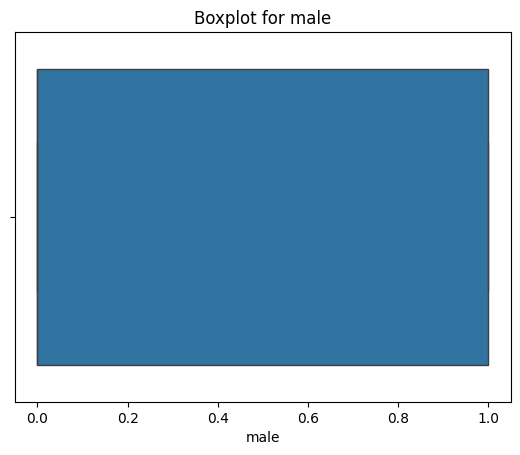


Column: age
Lower Bound: 21.0, Upper Bound: 77.0
Number of outliers: 0


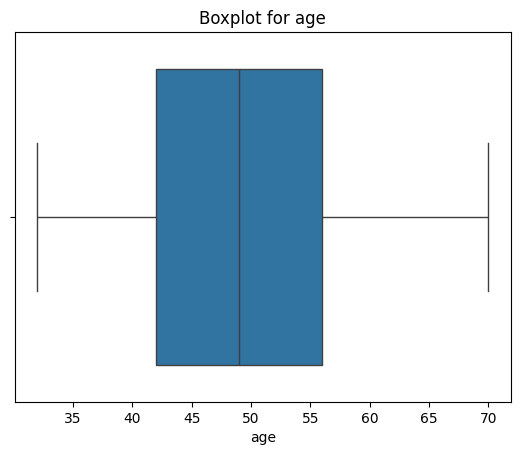


Column: currentSmoker
Lower Bound: -1.5, Upper Bound: 2.5
Number of outliers: 0


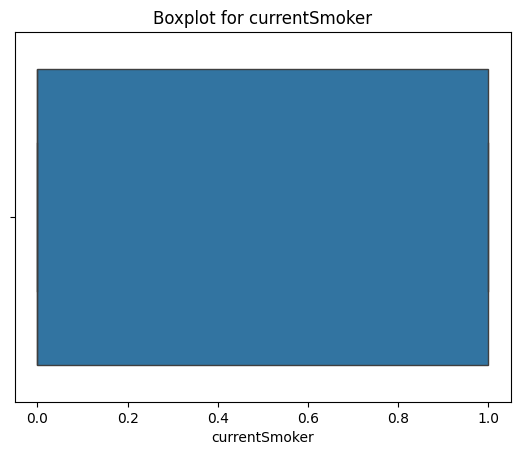


Column: cigsPerDay
Lower Bound: -30.0, Upper Bound: 50.0
Number of outliers: 12


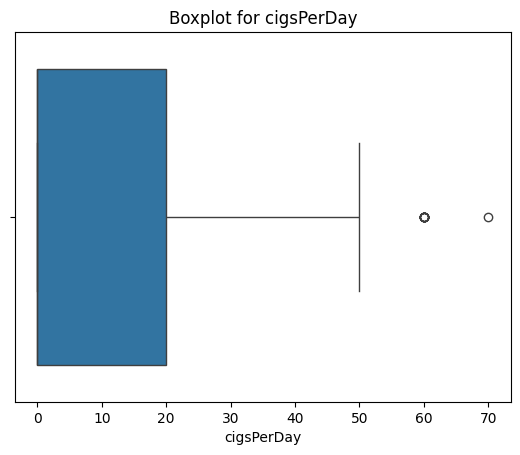


Column: BPMeds
Lower Bound: 0.0, Upper Bound: 0.0
Number of outliers: 124


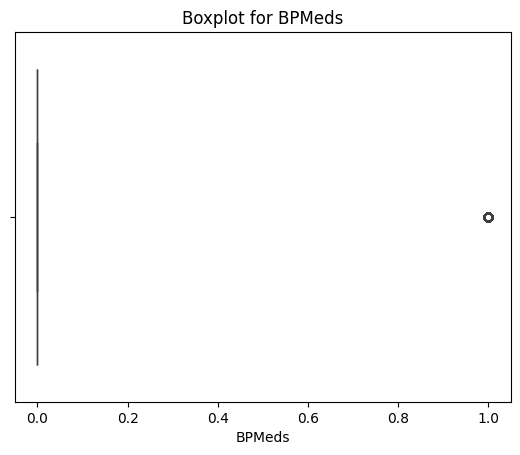


Column: diabetes
Lower Bound: 0.0, Upper Bound: 0.0
Number of outliers: 109


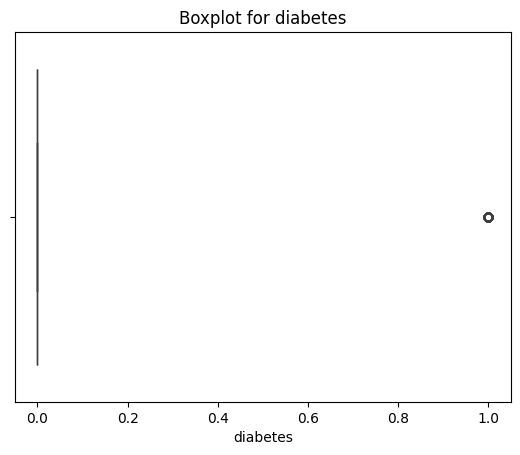


Column: totChol
Lower Bound: 122.0, Upper Bound: 346.0
Number of outliers: 57


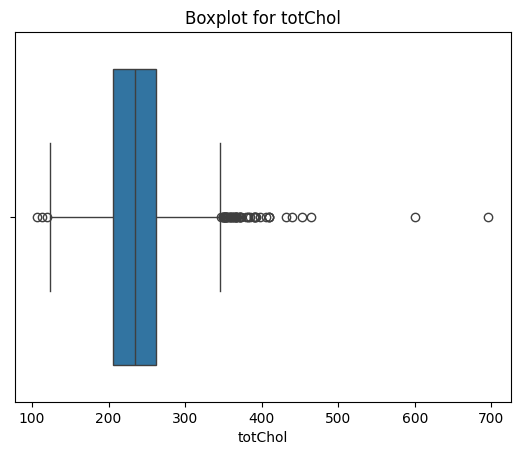


Column: sysBP
Lower Bound: 76.5, Upper Bound: 184.5
Number of outliers: 126


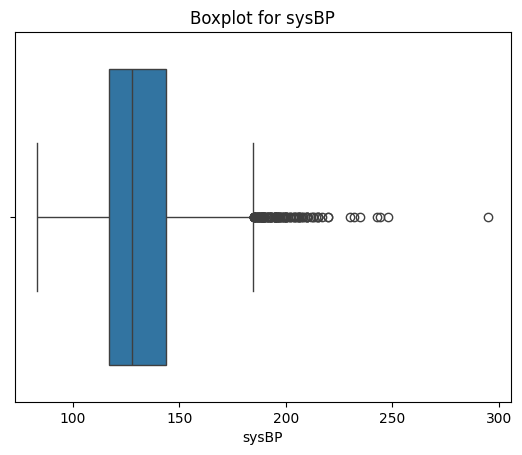


Column: diaBP
Lower Bound: 52.5, Upper Bound: 112.5
Number of outliers: 77


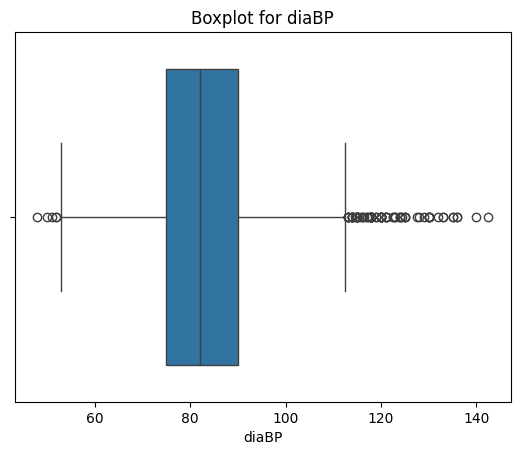


Column: BMI
Lower Bound: 15.645000000000003, Upper Bound: 35.464999999999996
Number of outliers: 97


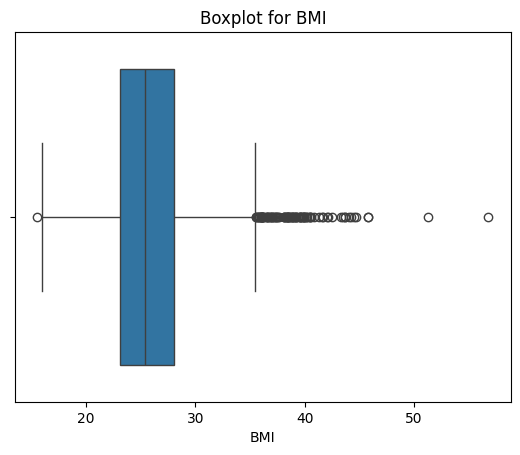


Column: heartRate
Lower Bound: 45.5, Upper Bound: 105.5
Number of outliers: 76


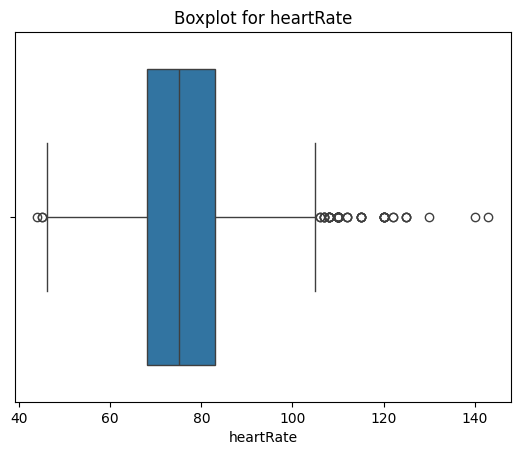


Column: glucose
Lower Bound: 52.5, Upper Bound: 104.5
Number of outliers: 262


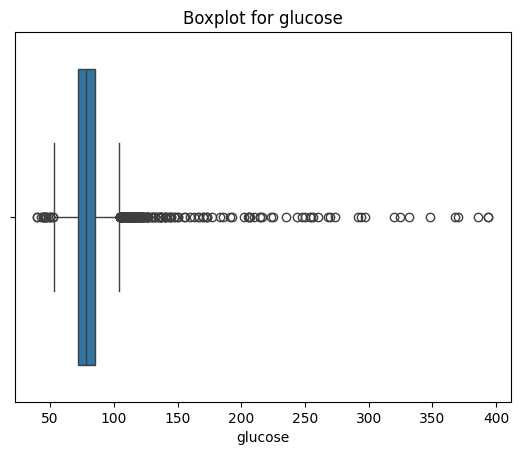


Column: Risk
Lower Bound: -1.5, Upper Bound: 2.5
Number of outliers: 0


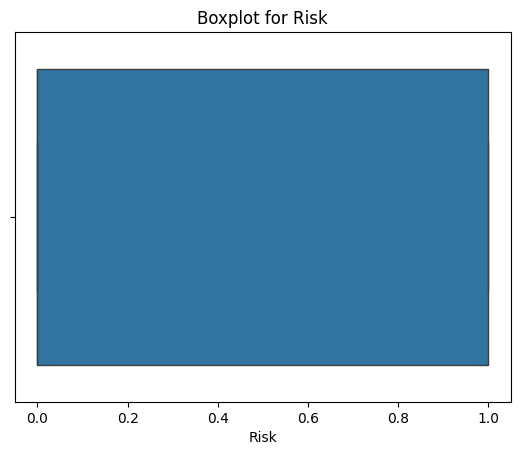

In [ ]:
# Check for outliers using IQR method
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"\nColumn: {column}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    # Detect outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Number of outliers: {len(outliers)}")

    # Plot boxplot
    sns.boxplot(data=df, x=column)
    plt.title(f"Boxplot for {column}")
    plt.show()

    # Handle outliers (remove or cap)
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])



Verifying that there are no outliers:
Column: male, Remaining Outliers: 0


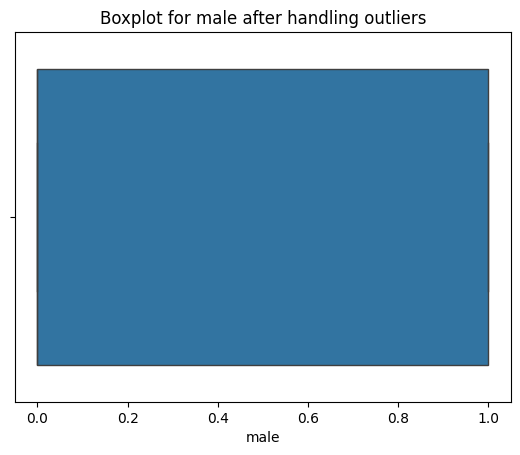

Column: age, Remaining Outliers: 0


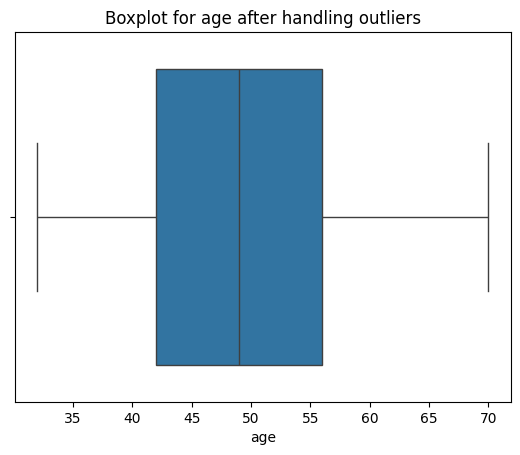

Column: currentSmoker, Remaining Outliers: 0


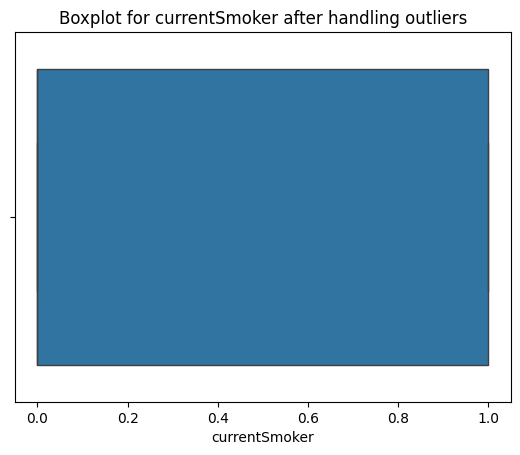

Column: cigsPerDay, Remaining Outliers: 0


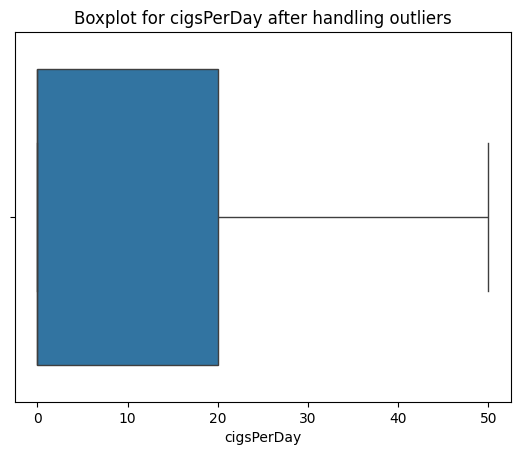

Column: BPMeds, Remaining Outliers: 0


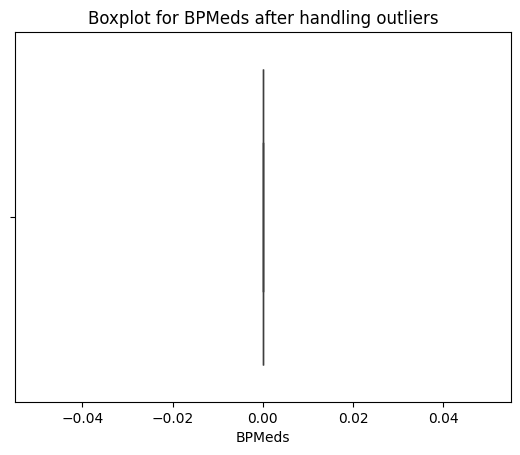

Column: diabetes, Remaining Outliers: 0


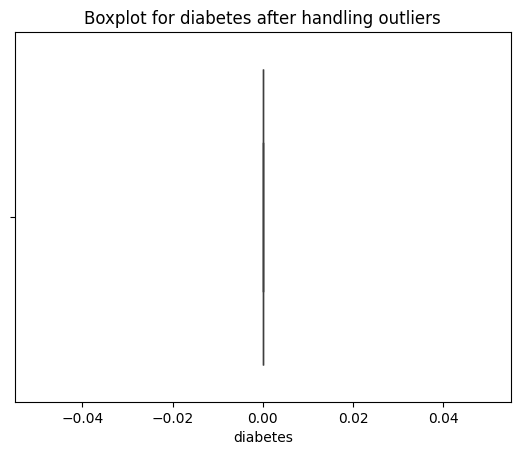

Column: totChol, Remaining Outliers: 0


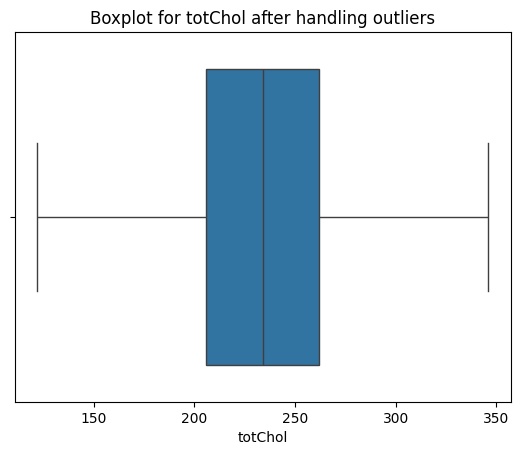

Column: sysBP, Remaining Outliers: 0


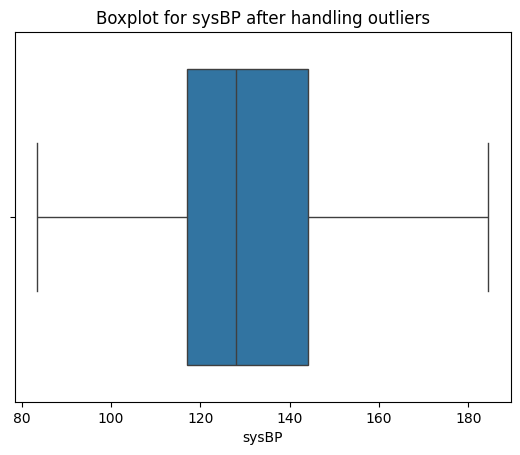

Column: diaBP, Remaining Outliers: 0


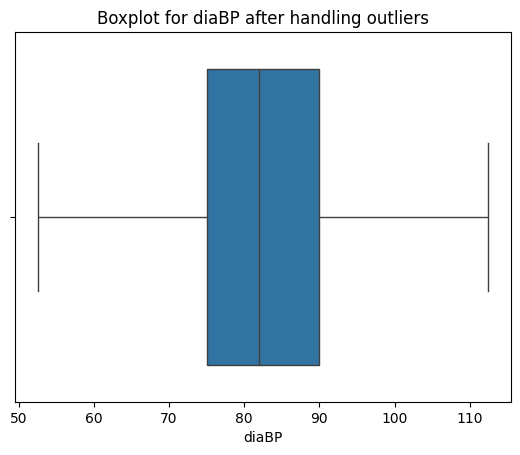

Column: BMI, Remaining Outliers: 0


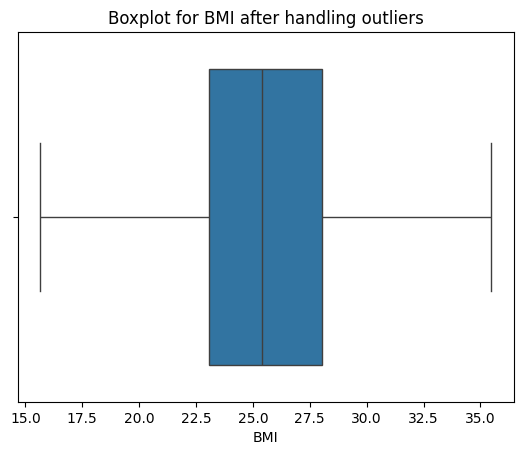

Column: heartRate, Remaining Outliers: 0


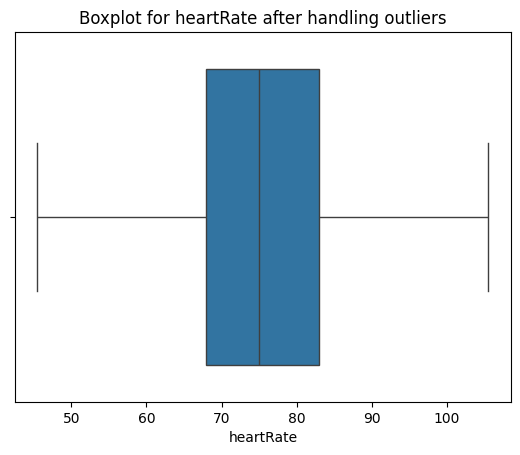

Column: glucose, Remaining Outliers: 0


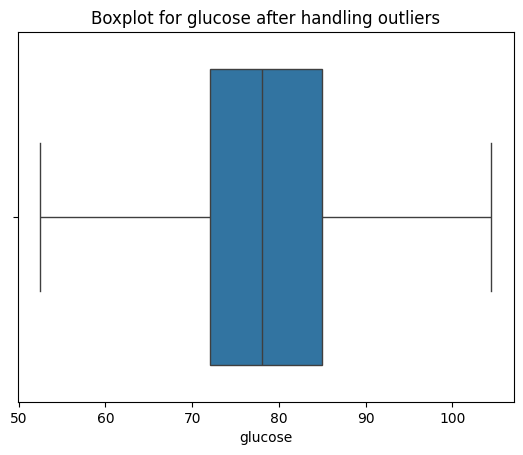

Column: Risk, Remaining Outliers: 0


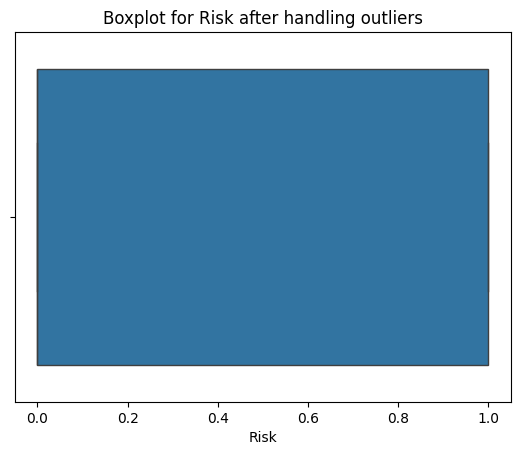

In [ ]:
# Check for outliers using IQR method and handle them
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect and handle outliers (cap them)
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Verify that there are no outliers
print("\nVerifying that there are no outliers:")
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Check if any values are still outside bounds
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Column: {column}, Remaining Outliers: {len(outliers)}")

    # Replot boxplot to confirm
    sns.boxplot(data=df, x=column)
    plt.title(f"Boxplot for {column} after handling outliers")
    plt.show()


# **After preprocessing the Accuracy of the Dataset**

In [ ]:
!pip install prettytable

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Check your dataset
print("Columns in dataset:")
print(df.columns)

# Define the target column
target_column = 'Risk'  # Replace 'target' with the actual name of your target column if different.

# Encode the target column if it's categorical
label_encoder = LabelEncoder()
df[target_column] = label_encoder.fit_transform(df[target_column])

# Define features (X) and target (y)
X = df.drop(target_column, axis=1)  # Features
y = df[target_column]              # Target

# Handle categorical features by converting to numerical
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM (Linear Kernel)": SVC(kernel='linear', random_state=42),
    "Support Vector Classifier": SVC(random_state=42),
    "Naive Bayes": GaussianNB(),
}

# Train and evaluate models
accuracy_results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy

# Display results in a table
accuracy_table = PrettyTable()
accuracy_table.field_names = ["Model", "Accuracy"]

for model_name, accuracy in accuracy_results.items():
    accuracy_table.add_row([model_name, f"{accuracy:.4f}"])

print(accuracy_table)


Columns in dataset:
Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'diabetes',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'Risk'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:10:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


+---------------------------+----------+
|           Model           | Accuracy |
+---------------------------+----------+
|       Random Forest       |  0.8939  |
|       Decision Tree       |  0.8325  |
|          XGBoost          |  0.8821  |
|    Logistic Regression    |  0.8903  |
|    K-Nearest Neighbors    |  0.8644  |
|    SVM (Linear Kernel)    |  0.8892  |
| Support Vector Classifier |  0.8915  |
|        Naive Bayes        |  0.8868  |
+---------------------------+----------+


# **Data Balancing**

In [ ]:
pip install imbalanced-learn

**Applying Adasyn**

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Check your dataset
print("Columns in dataset:")
print(df.columns)

# Define the target column
target_column = 'Risk'  # Replace 'Risk' with the actual name of your target column if different.

# Encode the target column if it's categorical
label_encoder = LabelEncoder()
df[target_column] = label_encoder.fit_transform(df[target_column])

# Define features (X) and target (y)
X = df.drop(target_column, axis=1)  # Features
y = df[target_column]              # Target

# Handle categorical features by converting to numerical
X = pd.get_dummies(X)

# Split the dataset into training and testing sets before applying ADASYN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply ADASYN to the training data
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Train a model for demonstration (e.g., Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_adasyn, y_train_adasyn)

# Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Display results
print("Accuracy after applying ADASYN:", f"{accuracy:.4f}")


Columns in dataset:
Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'diabetes',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'Risk'],
      dtype='object')
Accuracy after applying ADASYN: 0.8833


**APPLYING SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Check your dataset
print("Columns in dataset:")
print(df.columns)

# Define the target column
target_column = 'Risk'  # Replace 'target' with the actual name of your target column.

# Encode the target column if it's categorical
label_encoder = LabelEncoder()
df[target_column] = label_encoder.fit_transform(df[target_column])

# Define features (X) and target (y)
X = df.drop(target_column, axis=1)  # Features
y = df[target_column]              # Target

# Handle categorical features by converting to numerical
X = pd.get_dummies(X)

# Split the dataset into training and testing sets before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a model for demonstration (e.g., Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Display results
print("Accuracy after applying SMOTE:", f"{accuracy:.4f}")


Columns in dataset:
Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'diabetes',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'Risk'],
      dtype='object')
Accuracy after applying SMOTE: 0.8903


# **Feature Selection**

In [ ]:
# Import necessary libraries
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Define the target column
target_column = 'Risk'  # Replace with the actual target column name

# Encode the target column if it's categorical
label_encoder = LabelEncoder()
df[target_column] = label_encoder.fit_transform(df[target_column])

# Define features (X) and target (y)
X = df.drop(target_column, axis=1)  # Features
y = df[target_column]              # Target

# Convert categorical features to numeric (if any)
X = pd.get_dummies(X)

# Ensure non-negative values for Chi-Square by applying MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Feature Selection Methods
def select_features_anova(X, y, k=10):
    selector = SelectKBest(score_func=f_classif, k=k)
    X_new = selector.fit_transform(X, y)
    return X_new

def select_features_chi2(X, y, k=10):
    selector = SelectKBest(score_func=chi2, k=k)
    X_new = selector.fit_transform(X, y)
    return X_new

def select_features_pca(X, n_components=10):
    pca = PCA(n_components=n_components)
    X_new = pca.fit_transform(X)
    return X_new

def select_features_rfe(X, y, estimator, n_features_to_select=10):
    rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select)
    X_new = rfe.fit_transform(X, y)
    return X_new

# Evaluate models with selected features
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

feature_selection_methods = {
    "ANOVA": lambda X, y: select_features_anova(X, y, k=10),
    "Chi-Square": lambda X, y: select_features_chi2(X, y, k=10),
    "PCA": lambda X, _: select_features_pca(X, n_components=10),
    "RFE": lambda X, y: select_features_rfe(X, y, estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)
}

# Initialize table for results
accuracy_table = PrettyTable()
accuracy_table.field_names = ["Feature Selection Method", "Model", "Accuracy"]

# Loop through feature selection methods and models
for method_name, method_func in feature_selection_methods.items():
    # Apply feature selection
    X_train_selected = method_func(X_train, y_train)
    X_test_selected = method_func(X_test, y_test) if method_name != "PCA" else PCA(n_components=10).fit_transform(X_test)

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Add results to table
        accuracy_table.add_row([method_name, model_name, f"{accuracy:.4f}"])

# Display the results
print(accuracy_table)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [4 5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [4 5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


+--------------------------+---------------------+----------+
| Feature Selection Method |        Model        | Accuracy |
+--------------------------+---------------------+----------+
|          ANOVA           |    Random Forest    |  0.8880  |
|          ANOVA           | Logistic Regression |  0.8880  |
|        Chi-Square        |    Random Forest    |  0.8880  |
|        Chi-Square        | Logistic Regression |  0.8880  |
|           PCA            |    Random Forest    |  0.8408  |
|           PCA            | Logistic Regression |  0.8726  |
|           RFE            |    Random Forest    |  0.8880  |
|           RFE            | Logistic Regression |  0.8880  |
+--------------------------+---------------------+----------+


# **Hyperparameter Tuning**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grids for each model
param_grids = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "penalty": ["l2"],
        "solver": ["lbfgs", "liblinear"]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    },
    "XGBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    }
}

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Perform Grid Search for each model
best_params = {}
accuracy_results = {}

for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name],
                               scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best parameters and accuracy
    best_params[model_name] = grid_search.best_params_
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy

# Display results
print("\nBest Hyperparameters:")
for model_name, params in best_params.items():
    print(f"{model_name}: {params}")

print("\nModel Accuracies:")
for model_name, accuracy in accuracy_results.items():
    print(f"{model_name}: {accuracy:.4f}")


Tuning hyperparameters for Random Forest...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Tuning hyperparameters for SVM...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Tuning hyperparameters for Logistic Regression...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Tuning hyperparameters for KNN...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Tuning hyperparameters for XGBoost...
Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:35:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Hyperparameters:
Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
SVM: {'C': 1, 'kernel': 'linear'}
Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
KNN: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

Model Accuracies:
Random Forest: 0.8986
SVM: 0.8892
Logistic Regression: 0.8903
KNN: 0.8774
XGBoost: 0.8998


**Confusion Matrix**

Tuning hyperparameters for Random Forest...
Fitting 3 folds for each of 36 candidates, totalling 108 fits


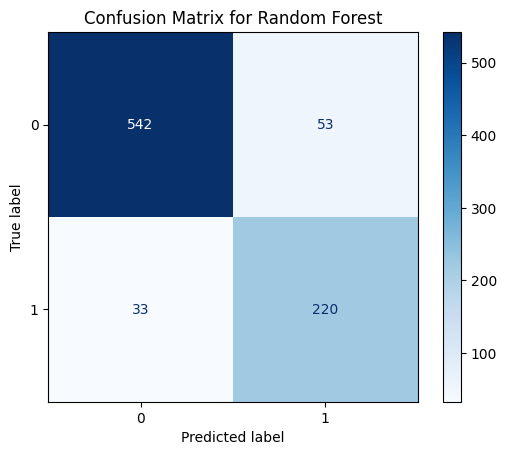

Tuning hyperparameters for SVM...
Fitting 3 folds for each of 6 candidates, totalling 18 fits


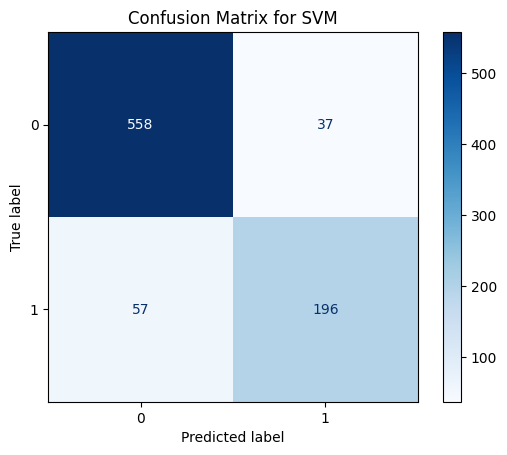

Tuning hyperparameters for Logistic Regression...
Fitting 3 folds for each of 6 candidates, totalling 18 fits


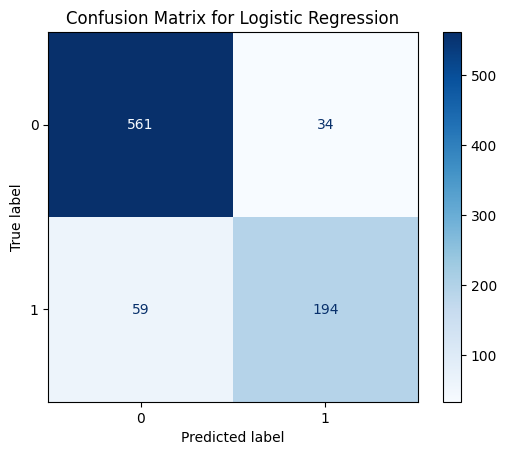

Tuning hyperparameters for KNN...
Fitting 3 folds for each of 12 candidates, totalling 36 fits


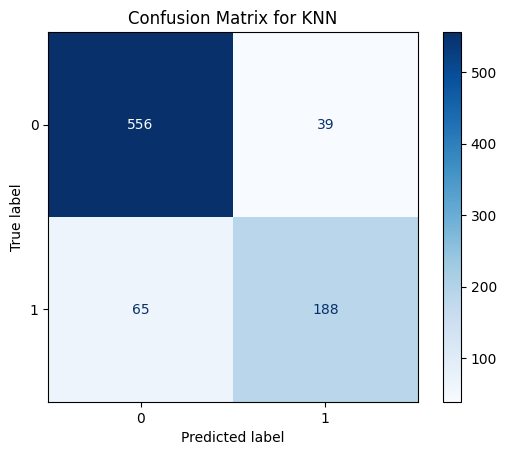

Tuning hyperparameters for XGBoost...
Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:42:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


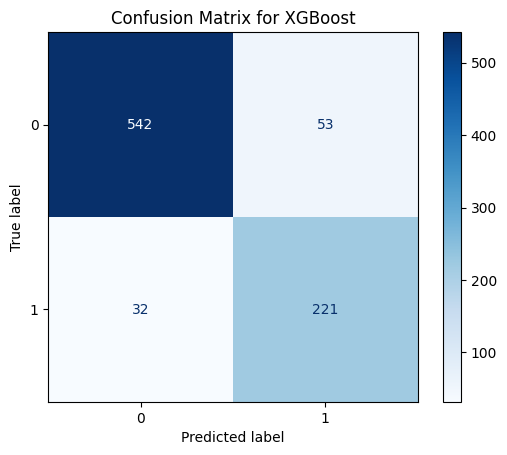


Best Hyperparameters:
Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
SVM: {'C': 1, 'kernel': 'linear'}
Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
KNN: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

Model Accuracies:
Random Forest: 0.8986
SVM: 0.8892
Logistic Regression: 0.8903
KNN: 0.8774
XGBoost: 0.8998


In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grids for each model
param_grids = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "penalty": ["l2"],
        "solver": ["lbfgs", "liblinear"]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    },
    "XGBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    }
}

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Perform Grid Search for each model
best_params = {}
accuracy_results = {}
confusion_matrices = {}

for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name],
                               scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best parameters and accuracy
    best_params[model_name] = grid_search.best_params_
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy

    # Compute and store confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[model_name] = cm

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Display results
print("\nBest Hyperparameters:")
for model_name, params in best_params.items():
    print(f"{model_name}: {params}")

print("\nModel Accuracies:")
for model_name, accuracy in accuracy_results.items():
    print(f"{model_name}: {accuracy:.4f}")


# **Model Evaluation & ROC Curve analysis**


Evaluating Random Forest...
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       595
           1       0.81      0.87      0.84       253

    accuracy                           0.90       848
   macro avg       0.87      0.89      0.88       848
weighted avg       0.90      0.90      0.90       848

ROC-AUC Score: 0.9485


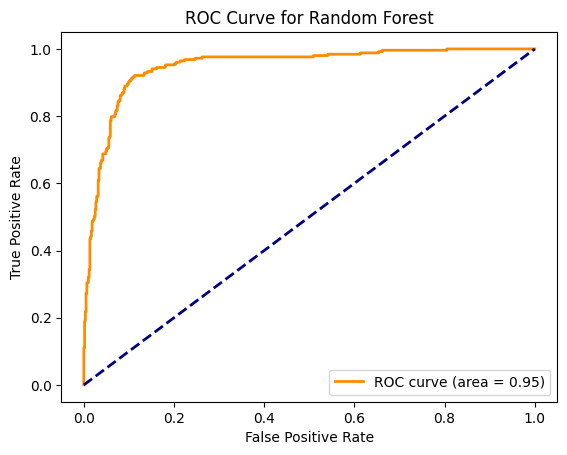

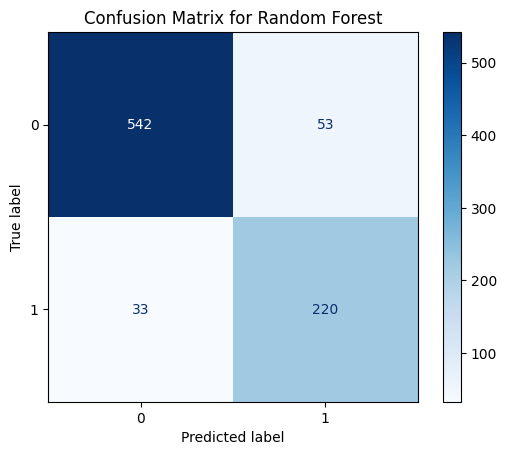


Evaluating SVM...
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       595
           1       0.84      0.77      0.81       253

    accuracy                           0.89       848
   macro avg       0.87      0.86      0.86       848
weighted avg       0.89      0.89      0.89       848



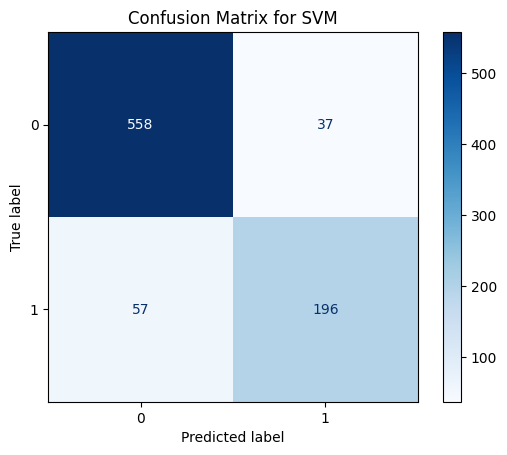


Evaluating Logistic Regression...
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       595
           1       0.85      0.77      0.81       253

    accuracy                           0.89       848
   macro avg       0.88      0.85      0.87       848
weighted avg       0.89      0.89      0.89       848

ROC-AUC Score: 0.9410


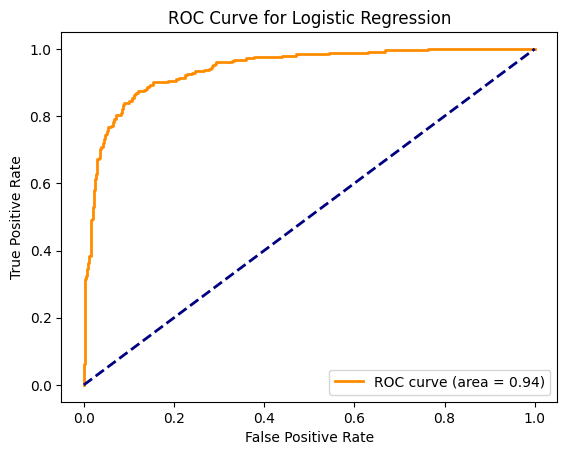

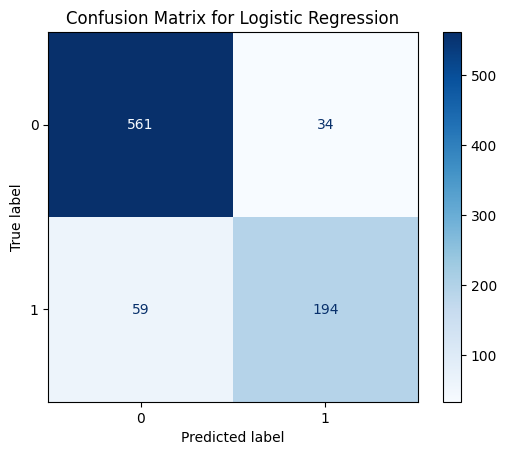


Evaluating KNN...
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       595
           1       0.83      0.74      0.78       253

    accuracy                           0.88       848
   macro avg       0.86      0.84      0.85       848
weighted avg       0.88      0.88      0.88       848

ROC-AUC Score: 0.9220


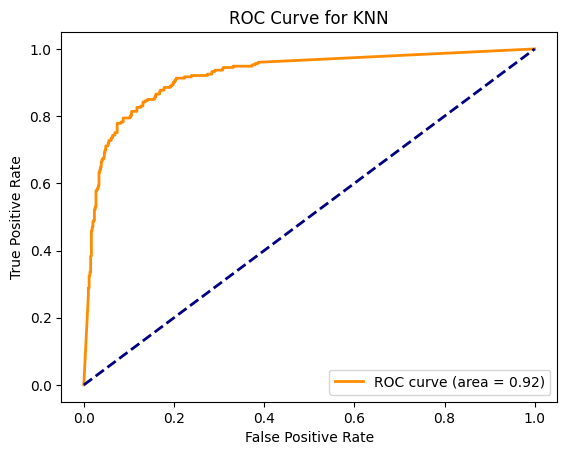

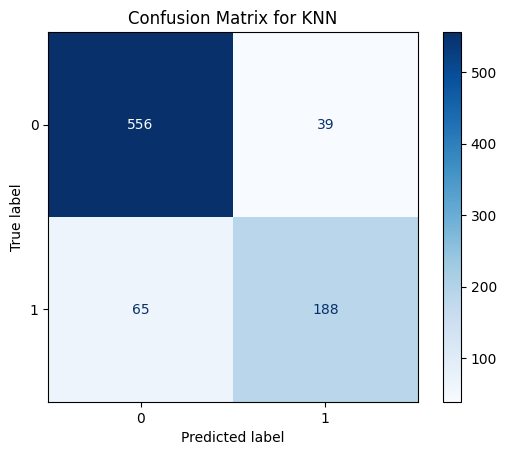


Evaluating XGBoost...
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       595
           1       0.81      0.87      0.84       253

    accuracy                           0.90       848
   macro avg       0.88      0.89      0.88       848
weighted avg       0.90      0.90      0.90       848

ROC-AUC Score: 0.9498


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


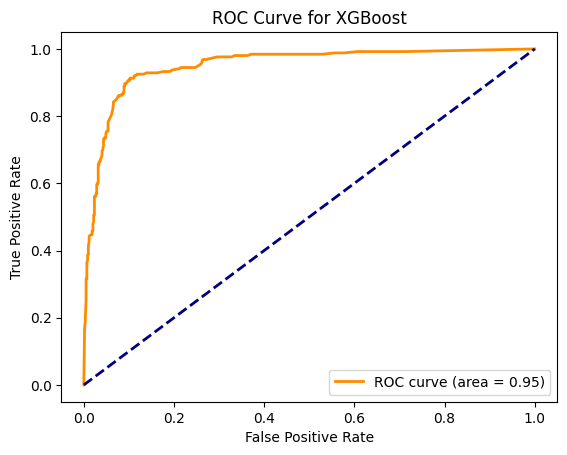

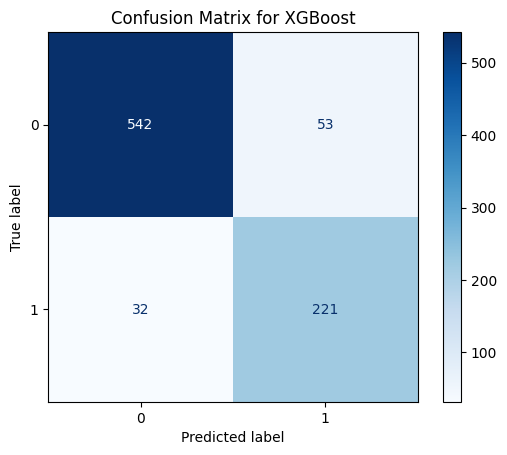

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import numpy as np

# Evaluate each model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")

    # Use the best model from GridSearchCV
    best_model = models[model_name].set_params(**best_params[model_name])
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    y_proba = None

    # If the model supports probability predictions
    if hasattr(best_model, "predict_proba"):
        y_proba = best_model.predict_proba(X_test)[:, 1]  # Take the positive class probabilities

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # If applicable, compute and display ROC-AUC score
    if y_proba is not None:
        roc_auc = roc_auc_score(y_test, y_proba)
        print(f"ROC-AUC Score: {roc_auc:.4f}")

        # Plot ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name}')
        plt.legend(loc="lower right")
        plt.show()

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


# **Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform cross-validation for each model
cv_results = {}

for model_name, model in models.items():
    print(f"\nPerforming Cross-Validation for {model_name}...")

    # Use the best parameters obtained from GridSearchCV
    best_model = models[model_name].set_params(**best_params[model_name])

    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
    cv_results[model_name] = cv_scores

    # Print the results
    print(f"Cross-Validation Accuracy Scores for {model_name}: {cv_scores}")
    print(f"Mean CV Accuracy for {model_name}: {np.mean(cv_scores):.4f}")
    print(f"Standard Deviation of CV Accuracy for {model_name}: {np.std(cv_scores):.4f}")

# Display summarized results
print("\nCross-Validation Results Summary:")
for model_name, scores in cv_results.items():
    print(f"{model_name}: Mean Accuracy = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}")



Performing Cross-Validation for Random Forest...
Cross-Validation Accuracy Scores for Random Forest: [0.89858491 0.8879717  0.87617925 0.89622642 0.89976415]
Mean CV Accuracy for Random Forest: 0.8917
Standard Deviation of CV Accuracy for Random Forest: 0.0088

Performing Cross-Validation for SVM...
Cross-Validation Accuracy Scores for SVM: [0.88443396 0.88443396 0.86910377 0.88915094 0.88561321]
Mean CV Accuracy for SVM: 0.8825
Standard Deviation of CV Accuracy for SVM: 0.0069

Performing Cross-Validation for Logistic Regression...
Cross-Validation Accuracy Scores for Logistic Regression: [0.88089623 0.88089623 0.86674528 0.88915094 0.88089623]
Mean CV Accuracy for Logistic Regression: 0.8797
Standard Deviation of CV Accuracy for Logistic Regression: 0.0072

Performing Cross-Validation for KNN...
Cross-Validation Accuracy Scores for KNN: [0.87735849 0.86556604 0.875      0.89858491 0.87146226]
Mean CV Accuracy for KNN: 0.8776
Standard Deviation of CV Accuracy for KNN: 0.0112

Perform

# ***Result Analysis***

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:05:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Final Model Evaluation Results:
                 Model  Accuracy  Precision    Recall  F1-Score
4              XGBoost  0.899764   0.903174  0.899764  0.900861
0        Random Forest  0.898585   0.901810  0.898585  0.899646
2  Logistic Regression  0.890330   0.888739  0.890330  0.888608
1                  SVM  0.889151   0.887592  0.889151  0.887786
3                  KNN  0.877358   0.875300  0.877358  0.875348


<Figure size 1000x600 with 0 Axes>

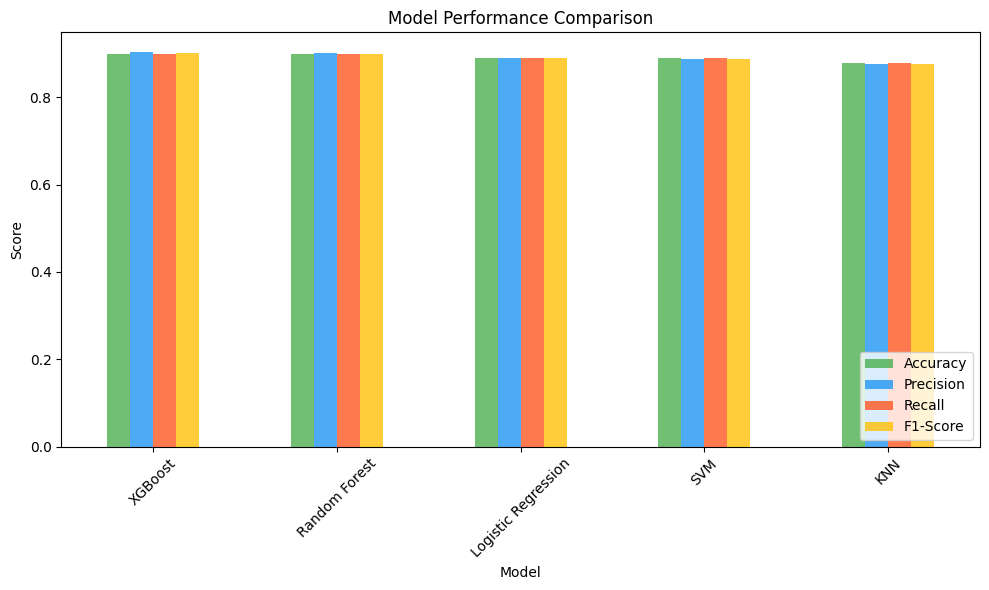

In [ ]:
import pandas as pd

# Compile final results into a DataFrame
results = []

for model_name, model in models.items():
    # Use the best model and calculate final metrics
    best_model = models[model_name].set_params(**best_params[model_name])
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

# Create a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results sorted by F1-Score
results_df = results_df.sort_values(by="F1-Score", ascending=False)
print("\nFinal Model Evaluation Results:")
print(results_df)

# Plot results for visualization
plt.figure(figsize=(10, 6))
results_df.plot(x="Model", kind="bar", stacked=False, figsize=(10, 6),
                color=["#4CAF50", "#2196F3", "#FF5722", "#FFC107"], alpha=0.8)
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend(loc="lower right")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
